In [1]:
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import seaborn as sns

Buat data

In [2]:
X, y = make_regression(n_samples = 1675, n_features = 11, n_informative = 3, random_state = 10969, noise = 3.4)

In [3]:
colnames = ['Field'+str(i) for i in range(1, len(X.T)+1)]

df = pd.DataFrame(X, columns = colnames)
df['Label'] = y
df.head()

,Field1,Field2,Field3,Field4,Field5,Field6,Field7,Field8,Field9,Field10,Field11,Label
0,-0.250041,-1.102724,1.226596,1.063406,0.876390,1.064225,1.392316,-0.751513,-0.780306,1.111803,-0.034798,150.255846
1,0.599606,-1.747249,1.019355,0.323604,-0.398127,0.442932,0.078457,-0.777195,-0.281770,0.402486,-1.275251,28.223530
2,0.245572,-0.178306,0.989576,1.013558,0.025820,1.002795,-0.810364,1.244189,0.672641,-0.896013,1.887122,91.137346
3,0.927715,-0.107769,0.240605,0.611723,-1.151659,-0.141322,0.434944,1.279149,-1.288027,-1.952664,0.568316,-94.996919
4,0.642514,-0.570357,0.551990,-1.101514,0.333149,-0.158189,-0.080269,-0.389632,-1.054336,-1.331450,-0.526840,-91.910720


Feature Engineering

In [4]:
# Ubah Field2 menjadi bentuk log
df['Field2'] = np.log(np.abs(df['Field2']))

# Ubah Field3 menjadi kategorik dengan 2 kategori (biner)
df['Field3'] = [1 if i < 0 else 0 for i in df['Field3']]

# Ubah Field4 menjadi kategorik dengan 4 kategori
df['Field4'] = [0 if i < -1 else 1 if i < 0 else 2 if i < 1 else 3 for i in df['Field4']]

# Ubah Field7 dengan rumus aneh 
df['Field7'] = np.sqrt(np.abs(df['Field7'])) * np.pi ** 3

# Ubah Field 8 menjadi ratusan
df['Field8'] = df['Field8'] * 134

# Ubah Field 9
df['Field9'] = df['Field1'] * 2 - df['Field11']*np.pi

# Ubah Field 10
df['Field10'] = np.abs(df['Field10'])

df.head()

,Field1,Field2,Field3,Field4,Field5,Field6,Field7,Field8,Field9,Field10,Field11,Label
0,-0.250041,0.097783,0,3,0.876390,1.064225,36.586309,-100.702777,-0.390761,1.111803,-0.034798,150.255846
1,0.599606,0.558043,0,2,-0.398127,0.442932,8.684894,-104.144083,5.205531,0.402486,-1.275251,28.223530
2,0.245572,-1.724255,0,3,0.025820,1.002795,27.911919,166.721283,-5.437425,0.896013,1.887122,91.137346
3,0.927715,-2.227769,0,2,-1.151659,-0.141322,20.448733,171.405966,0.070012,1.952664,0.568316,-94.996919
4,0.642514,-0.561492,0,0,0.333149,-0.158189,8.784653,-52.210645,2.940143,1.331450,-0.526840,-91.910720


Splitting Data

In [10]:
X = df.drop(['Label'],axis=1)
y = df['Label'].reset_index(drop=True)

Import Library

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

![](https://1.bp.blogspot.com/--Ktw4spozkk/X8J61DTY_2I/AAAAAAAACYg/-284FUbeOKcK3DWoWmajdLN7zYBvFdBLQCPcBGAYYCw/s277/Rumus%2BMSE.jpg)

**MSE atau Mean Squared Error** adalah metrik evaluasi yang sering digunakan dalam statistik dan machine learning untuk mengukur perbedaan antara nilai prediksi dan nilai aktual. MSE menghitung selisih antara nilai prediksi dan nilai aktual, kemudian mengkuadratkan selisih tersebut, dihitung rata-rata, dan hasilnya merupakan nilai MSE.

Secara matematis, MSE dapat dihitung dengan rumus berikut:

MSE = $mean((y_{pred} - y_{actual})^2)$

Di mana:

y_pred adalah nilai prediksi dari model
y_actual adalah nilai aktual dari data yang digunakan untuk evaluasi
mean adalah nilai rata-rata

MSE memberikan nilai yang selalu positif, dan semakin kecil nilai MSE, semakin baik performa model dalam memprediksi nilai aktual. Namun, nilai MSE sulit diinterpretasikan secara intuitif karena tergantung pada satuan pengukuran yang digunakan dalam data. Oleh karena itu, MSE sering digunakan bersama dengan metrik evaluasi lainnya, seperti RMSE dan MAE, untuk memberikan pemahaman yang lebih lengkap tentang performa model.

![](https://1.bp.blogspot.com/-MM7g3UQjW9s/X8JzKPlxfQI/AAAAAAAACX0/zNDQCP4CJWANa1Bh_zBoLBCCOuUnCXKigCPcBGAYYCw/s16000/Rumus%2BRMSE.jpg)

**RMSE atau Root Mean Squared Error** adalah salah satu metrik evaluasi dalam statistik yang digunakan untuk mengukur seberapa dekat prediksi sebuah model dengan nilai aktual. RMSE menghitung perbedaan antara nilai prediksi dan nilai aktual, kemudian mengkuadratkan selisih tersebut, dihitung rata-rata, dan akar kuadrat dari nilai rata-rata tersebut.

Secara matematis, RMSE dapat dihitung dengan rumus berikut:

RMSE = $sqrt(mean((y_{pred} - y_{actual})^2))$

Di mana:

y_pred adalah nilai prediksi dari model
y_actual adalah nilai aktual dari data yang digunakan untuk evaluasi
mean adalah nilai rata-rata
sqrt adalah fungsi akar kuadrat
RMSE digunakan untuk membandingkan performa model dan menentukan apakah model tersebut cukup akurat dalam memprediksi nilai. Semakin kecil nilai RMSE, semakin baik performa model tersebut dalam memprediksi nilai aktual.

**MAE atau Mean Absolute Error** adalah metrik evaluasi dalam statistik dan machine learning yang digunakan untuk mengukur perbedaan antara nilai prediksi dan nilai aktual dengan cara menghitung rata-rata dari nilai absolut selisih antara nilai prediksi dan nilai aktual.

Secara matematis, MAE dapat dihitung dengan rumus berikut:

MAE = $mean(|y_{pred} - y_{actual}|)$

Di mana:

y_pred adalah nilai prediksi dari model
y_actual adalah nilai aktual dari data yang digunakan untuk evaluasi
mean adalah nilai rata-rata
| | adalah fungsi nilai absolut
MAE memberikan nilai yang selalu positif dan mudah diinterpretasikan karena memiliki satuan yang sama dengan data asli. Semakin kecil nilai MAE, semakin baik performa model dalam memprediksi nilai aktual. MAE lebih tahan terhadap outlier dibandingkan MSE atau RMSE, sehingga sering digunakan ketika data memiliki outlier yang signifikan.

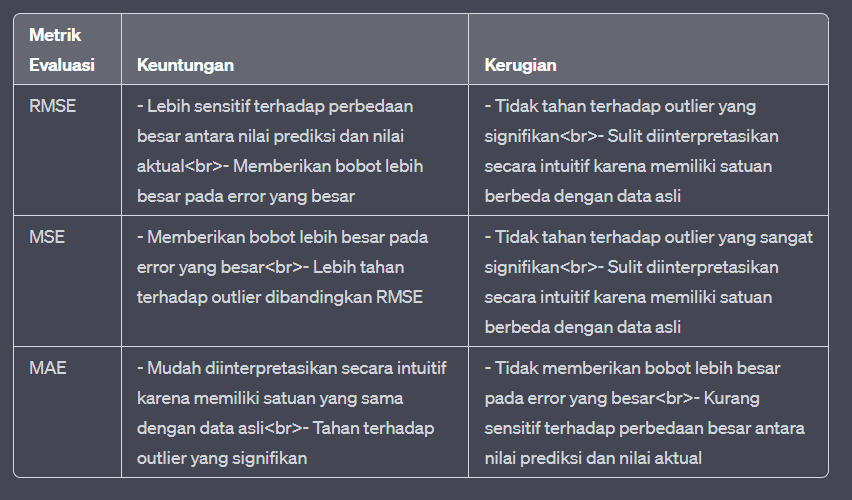

Fit Model

In [11]:
def evaluate_models(models, X, y):
    # Split data menjadi train set dan test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Inisialisasi list untuk menyimpan hasil evaluasi
    results = []
    
    # Looping untuk setiap model
    for name, model in models.items():
        # Fitting model pada train set
        model.fit(X_train, y_train)

        # Prediksi nilai pada test set
        y_pred = model.predict(X_test)

        # Hitung nilai evaluasi MSE, RMSE, dan MAE
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        # Tambahkan hasil evaluasi ke dalam list
        results.append([name, mse, rmse, mae])
    
    # Konversi hasil evaluasi ke dalam dataframe
    df_results = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'MAE'])
    
    # Tampilkan dataframe hasil evaluasi
    return df_results

In [13]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# Membuat objek LinearRegression
models = {'LinearReg':LinearRegression(),
          'XGBR':xgb.XGBRegressor(),
          'RandomForest':RandomForestRegressor()}

# Evaluasi model
df_results = evaluate_models(models, X, y)

# Tampilkan hasil evaluasi
display(df_results)

,Model,MSE,RMSE,MAE
0,LinearReg,2661.508911,51.589814,41.104745
1,XGBR,3574.100264,59.783779,43.371115
2,RandomForest,3107.365044,55.743744,41.880302


Terlihat bahwa menggunakan model baseline bahwa 3 skoring tersebut masih menunjukkan error yang cukup besar. Tuning dan data preprocessing lebih lanjut diharapkan dapat meningkatkan akurasi model-model tersebut.